# 1 importar os Modulos necessarios

In [29]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

# 2 Pegar dados no Yahoo Finance

In [2]:
cd_negocio=["^BVSP","BRL=X"]
#lista contendo codigos da bovespa e do dolar

hoje=datetime.datetime.now()
#instancia a data de hoje utilizando o modulo datetime + o sub-modulo datetia + a função now()

um_ano_atras = hoje - datetime.timedelta(days=365)
#instancia a data de hoje utilizando o modulo datetime + a função timedelta() passando como parametro days e quantidade de dia

dd_mercado = yf.download(cd_negocio,um_ano_atras,hoje)
#Executa carregamento dos dados utilizando o modulo yFinance + metodo download, passando como parametro os codigos das empresas, a data inicial e a data final
display(dd_mercado)
#usado dentro do Jupyter para devolver uma tabela com as informações
#dentro do datafram(display) nos temos colunas e Indices, nesse caso o indice é o Date

[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-02-07    5.3269  111996.0  5.3269  111996.0  5.3430  112517.0  5.276800   
2022-02-08    5.2626  112234.0  5.2626  112234.0  5.2849  112251.0  5.251000   
2022-02-09    5.2584  112461.0  5.2584  112461.0  5.2880  113163.0  5.232774   
2022-02-10    5.2345  113359.0  5.2345  113359.0  5.2446  113812.0  5.170000   
2022-02-11    5.2487  113572.0  5.2487  113572.0  5.2512  114899.0  5.182800   
...              ...       ...     ...       ...     ...       ...       ...   
2023-01-30    5.1072  111888.0  5.1072  111888.0  5.1224  112920.0  5.081096   
2023-01-31    5.1149  113532.0  5.1149  113532.0  5.1337  113581.0  5.077500   
2023-02-01    5.0722  112303.0  5.0722  112303.0  5.0868  113598.0  5.047900   
2023-02-02    5.0535  109935.0  5.0535  109935.0  5.0545  112943.0  4.941700   
2023-02-03    5.0492  108490.0  5.0492  108490.0  5.1347  110570.0  5.046758   

                          Open           Volume              
               ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                         
2022-02-07  111490.0  5.326200  112247.0      0  10672800.0  
2022-02-08  110943.0  5.262800  111995.0      0  10157500.0  
2022-02-09  111710.0  5.256489  112233.0      0  13794500.0  
2022-02-10  112163.0  5.231429  112462.0      0  13267900.0  
2022-02-11  113128.0  5.248600  113368.0      0  18602800.0  
...              ...       ...       ...    ...         ...  
2023-01-30  111824.0  5.107200  112319.0      0  11272700.0  
2023-01-31  112145.0  5.114900  112273.0      0  12900200.0  
2023-02-01  110729.0  5.072200  113430.0      0  17821500.0  
2023-02-02  109747.0  5.053500  112072.0      0  15241800.0  
2023-02-03  108185.0  5.049200  110141.0      0  13235300.0  

[260 rows x 12 columns]

# 3.1 Manipulando os Dados - Seleção e Exclusão

In [3]:
dd_fechamento =dd_mercado['Adj Close']
#retorna a coluna de fechamento de valor, do dataframe Dados de Mercado
dd_fechamento.columns = ['dolar','ibovespa']
#altera o nome das colunas

dd_fechamento = dd_fechamento.dropna()
#remove todas as linhas que contenham a sigla Na(informação nula)

#dd_fechamento.head(50)
#buscamos apenas os 50 primeiros resultados



# 3.2 Manipulando dados - Criando Tabelas

In [4]:
dd_anuais = dd_fechamento.resample("Y").last()
#instancia os dados de fechamento anual, utilizando o sub-modulo resample do yfinance passando o parametro "Y" para filtrar os valores anuais(tambem podemos usar "M" para mes,"Q"para trimestres)
#em conjunto com o metodo last()
dd_mensais = dd_fechamento.resample("M").last()
dd_anuais

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.0492,108490.0


# 4 calcular Fechamento do dia, retorno no ano e retorno no mes dos ativos

In [5]:
ret_anual = dd_anuais.pct_change().dropna()
# calcula a rentabilidade anual e remove os NA
ret_anual

,dolar,ibovespa
Date,,
2023-12-31,-0.041315,-0.014005


In [16]:
ret_mensal = dd_mensais.pct_change().dropna()
# calcula a rentabilidade mensal e remove os NA
ret_mensal

,dolar,ibovespa
Date,,
2022-03-31,-0.068818,0.060605
2022-04-30,0.035243,-0.101026
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602


In [12]:
ret_diario = dd_fechamento.pct_change().dropna()
# calcula a rentabilidade diario e remove os NA
ret_diario

,dolar,ibovespa
Date,,
2022-02-08,-0.012071,0.002125
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
...,...,...
2023-01-30,0.008781,-0.005458
2023-01-31,0.001508,0.014693
2023-02-01,-0.008348,-0.010825


# 5 - Localizar o fechamento do dia anterios, retorno no mês e retorno no ano

In [14]:
ret_jan_26_2022=ret_diario.loc['2022-02-08','dolar']
#busca o valor do dolar no dia 26 utilizando localizador por nome 
ret_dolar_diario=ret_diario.iloc[1,0]
#linha a esquerda, e colune a direita
#busca o valor do dolar no dia 26 utilizando localizador matriz
ret_dolar_diario=ret_diario.iloc[-1,0]
#pega o resultado da ultima linha
#retorna o ultimo valor do dolar utilizando localizador matriz


In [63]:
ret_ibov_diario = ret_diario.iloc[-1,1]

In [62]:
ret_dolar_mensal = ret_mensal.iloc[-1,0]
ret_ibov_mensal = ret_mensal.iloc[-1,1]
ret_ibov_mensal

-0.044410386498960674

In [21]:
ret_ibov_anual = ret_anual.iloc[-1,1]
ret_dolar_anual = ret_anual.iloc[-1,0]

In [68]:
ret_dolar_mensal = round((ret_mensal.iloc[-1,0]*100),2)
#round arredonda o resultado multiplicando o valor por 100 e resumindo a duas casas decimais
ret_ibov_mensal = round((ret_mensal.iloc[-1,1]*100),2)

ret_ibov_anual = round((ret_anual.iloc[-1,1]*100),2)
ret_dolar_anual = round((ret_anual.iloc[-1,0]*100),2)

ret_ibov_diario = round((ret_diario.iloc[-1,0]*100),2)
ret_dolar_diario = round((ret_diario.iloc[-1,1]*100),2)



ret_dolar_mensal

-1.28

In [61]:
ret_ibov_anual

-1.4

# 6 - Fazer os graficos de perfomance do ultimo ano dos ativos

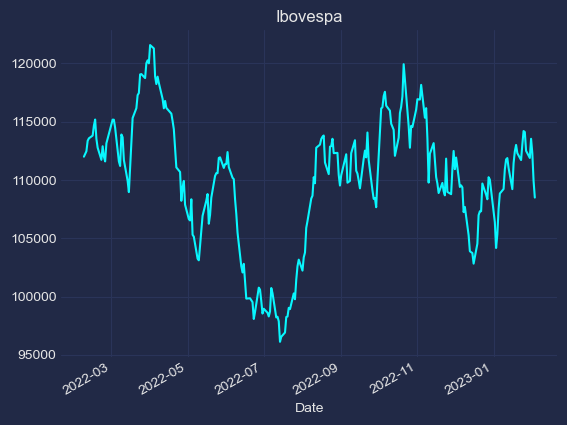

In [35]:
plt.style.use("cyberpunk")
#chama o matplotlib usando o modelo de grafico cyberpunk 

dd_fechamento.plot(y="ibovespa", use_index=True, legend=False)
#passa o ibovespa como eixo Y e o indice(data) como eixo X, elimina as legendas
plt.title("Ibovespa")
#adiciona titulo ao grafico

plt.savefig('iboves.png', dpi = 300)
#Salva a imagem do grafico na mesma pasta em que o codigo esta sendo executado, com qualidade de 300dpi

plt.show()
#exibe o grafico, apartir dos dados informados

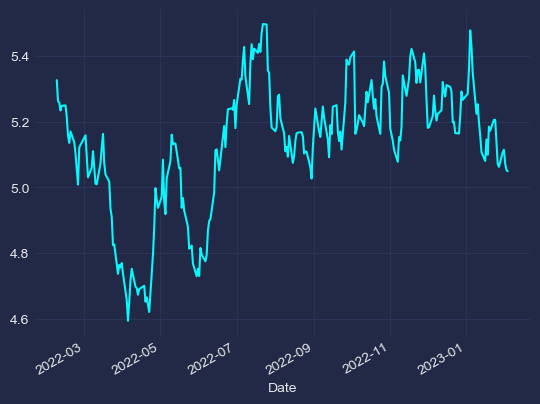

In [51]:
plt.style.use("cyberpunk")

dd_fechamento.plot(y="dolar", use_index=True, legend=False)
plt.savefig("dolar.png",dpi=300)

plt.show()

# 7 - Enviar e-mail

In [76]:
outlook = win32.Dispatch("outlook.application")
#inicia a aplicação do outlook em segundo plano

email = outlook.Createitem(0)
#abre uma instancia de e-mail

In [77]:
email.To = "wessalves95@gmail.com"
#destinatarios para envio
email.subject="Relatorio diario"
#assundo do e-mail
email.body= f'''Prezado diretor, segue o relatorio diario:

Bolsa:

No ano o ibovespa esta tendo uma rentabilidade de {ret_ibov_anual}%,
enquanto no mês a rentabilidade é de {ret_ibov_mensal}%,

No ultimo dia util, o fechamento do ibovespa foi de {ret_ibov_diario}%.

Dolar:

No ano o dolar esta tendo uma rentabilidade de {ret_dolar_anual}%,
enquanto no mês a rentabilidade é de {ret_dolar_mensal}%,

No ultimo dia util, o fechamento do dolar foi de {ret_dolar_diario}%.'''
#corpo do e-mail, utilizando  no corpo do e-mail as variaveis contendo os resultados, atraves do f-strings
anexo_ibovespa = r'C:\BootCamp- Varos\aula1\iboves'
#anexa um arquivo de imagem
anexo_dolar = r'C:\BootCamp- Varos\aula1\dolar'
#///

In [69]:
#teste da exibição do corpo do e-mail
print(f'''Prezado diretor, segue o relatorio diario:

Bolsa:

No ano o ibovespa esta tendo uma rentabilidade de {ret_ibov_anual}%,
enquanto no mês a rentabilidade é de {ret_ibov_mensal}%,

No ultimo dia util, o fechamento do ibovespa foi de {ret_ibov_diario}%.

Dolar:

No ano o dolar esta tendo uma rentabilidade de {ret_dolar_anual}%,
enquanto no mês a rentabilidade é de {ret_dolar_mensal}%,

No ultimo dia util, o fechamento do dolar foi de {ret_dolar_diario}%.''')

Prezado diretor, segue o relatorio diario:

Bolsa:

No ano o ibovespa esta tendo uma rentabilidade de -1.4%,
enquanto no mês a rentabilidade é de -4.44%,

No ultimo dia util, o fechamento do ibovespa foi de -0.09%.

Dolar:

No ano o ibovespa esta tendo uma rentabilidade de -4.13%,
enquanto no mês a rentabilidade é de -1.28%,

No ultimo dia util, o fechamento do dolar foi de -1.31%.
